# Project: Investigate a Dataset - No-show Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

>For this project I will be invesitigating a dataset that tracks no-show medical appointments at a number of hospitals across Brazil. I will first clean the data for ease of readability, then analyze the data looking for patterns within the variables that will hopfully provide some insight into a patient's ability to show for their appointment. This is a fairly large dataset with 110,527 rows and 14 columns. A description of the 14 columns is as follows:
- 'PatientId' - unique identifier for the individual patients
- 'AppointmentId' - unique identifier for each appointment
- 'Gender' - gender of the person for whom the appointment is scheduled, male or female
- 'ScheduledDay' - day the patient called to schedule the appointment
- 'AppointmentDay - day of the actual appointment made by the patient
- 'Age' - patient's age
- 'Neighbourhood - neighborhood of the hospital where the appointment will occur
- 'Scholorship' - indicates whether or not the patient is enrolled in Brasilian welfare      program Bolsa Família (True = 1, False = 0)
- 'Hipertension - (True = 1, False = 0)
- 'Diabetes' - (True = 1, False = 0)
- 'Alcoholism' - (True = 1, False = 0)
- 'Handcap' - number of handicaps the patient has at the time of the appointment
- 'SMS_received' - (True = 1, False = 0)
- 'No-Show' - No = showed, Yes = No-showed


### Questions for Analysis
>1. The first question I would like to explore is whether or not gender plays a role in the frequency of no-show appointments.

>2. Does the day of the appointment have any bearing on the frequency of patients not showing for their appointment?

>3. Do the number of days from when the appointment was scheduled, to when the appointment occurred, contribute to the probability of the patient not showing up.

>4. Is the patient's age a factor in their ability to show-up for their scheduled appointment?

>5. For patients who have the capability, is the SMS appointment reminder helpful in reducing no-show appointments?

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Check for the number of rows and columns
df.shape

(110527, 14)

### Observation:
- There are 110,527 rows and 14 columns

In [4]:
# Preview the headings and first few rows of data
df.head(5) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Preview the last few rows of data
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Observations:
- There a number of columns with misspelled headings, 'Neighbourhood' should be 'Neighborhood', 'Hipertension' should be 'Hypertension', and 'Handcap' should be 'Handicap'
- The formatting of the column labels are not uniformed and will need to be changed to make them easier to read
- All of the appointment times for 'AppointmentDay' appear to have the same time of 00:00:00, I will need to investigate this further and change the data as needed to make it easier to analyze across both columns
- The SMS_Received data is difficult to understand, I will change the data to 'Yes' instead of '1' and 'No' instead of '0'. This will make it easier to read and analyze
  

In [6]:
# View column data types, and check for null values
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Sum the null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# Check for unique values for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# Check for duplicate values
df.duplicated().sum()

0

### Observations:
- There are no null values in the dataset 
- 'PatientId' should be int64 not float64
- 'ScheduledDay' and 'AppointmentDay' will need to be changed to datetime format, and the time will need to be normalized
- There are 62,299 different patients in the dataset out of 110,527 appointments
- There are no duplicate rows in the dataset

## Data Cleaning:

### Fix column names:

- Fix typos: 'Neighbourhood' should be 'Neighborhood', Hipertension' should be 'Hypertension', 'Handcap' should be 'Handicap'.
- Replace '-' with '_' in 'No-show': No-show' should be 'No_show'
- Add '_' to 'Patient_ID', 'Appointment_ID', 'Scheduled_Day', and 'Appointment_Day' for uniformity and ease of readability

In [10]:
# Clean column names
df.rename(columns={'PatientId': 'Patient_ID', 'AppointmentID': 'Appointment_ID',
                     'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day',
                     'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension', 
                     'Handcap': 'Handicap', 'No-show': 'No_Show'}, inplace=True)

# Confirm changes
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Change data types

In [11]:
# Change data type of 'Patient_ID'   
df['Patient_ID'] = df['Patient_ID'].astype('int64')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Patient_ID       110527 non-null  int64 
 1   Appointment_ID   110527 non-null  int64 
 2   Gender           110527 non-null  object
 3   Scheduled_Day    110527 non-null  object
 4   Appointment_Day  110527 non-null  object
 5   Age              110527 non-null  int64 
 6   Neighborhood     110527 non-null  object
 7   Scholarship      110527 non-null  int64 
 8   Hypertension     110527 non-null  int64 
 9   Diabetes         110527 non-null  int64 
 10  Alcoholism       110527 non-null  int64 
 11  Handicap         110527 non-null  int64 
 12  SMS_received     110527 non-null  int64 
 13  No_Show          110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [12]:
# Change data types of 'Scheduled_Day', and 'Appointment_Day'
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])

In [13]:
# Confirm the time for 'Appointment_Day' is 00:00:00 for every row
unique_times = df['Appointment_Day'].dt.time.unique()
print(unique_times)

[datetime.time(0, 0)]


In [14]:
# Change datetime to only include date for 'Scheduled_day' and 'AppointmentDay'
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day']).dt.normalize()
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.normalize()

# Confirm normalization of the time for both columns
print(df[['Scheduled_Day', 'Appointment_Day']].head())

              Scheduled_Day           Appointment_Day
0 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
1 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
2 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
3 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00
4 2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00


### Clean data to make it easier to analyze

Replace 'Yes' for '1' and 'No' for '0' in the 'SMS_received'

In [15]:
# Replace 'Yes' for '1' and 'No' for '0' in the 'SMS_received' column
df['SMS_received'] = df['SMS_received'].replace({0: 'No', 1: 'Yes'})

# Confirm changes
df.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,No,No
1,558997776694438,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No,No
2,4262962299951,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No,No
3,867951213174,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No,No
4,8841186448183,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,No,No


<a id='eda'></a>
## Exploratory Data Analysis

## Question 1.
### Does gender play a role in probablity for no-shows?

In [16]:
# Calculate no-show rate by gender, find the mean
gender_no_show_rates = df.groupby('Gender')['No_Show'].apply(lambda x: (x == 'Yes').mean())
                                                        
print(gender_no_show_rates)  

Gender
F    0.203146
M    0.199679
Name: No_Show, dtype: float64


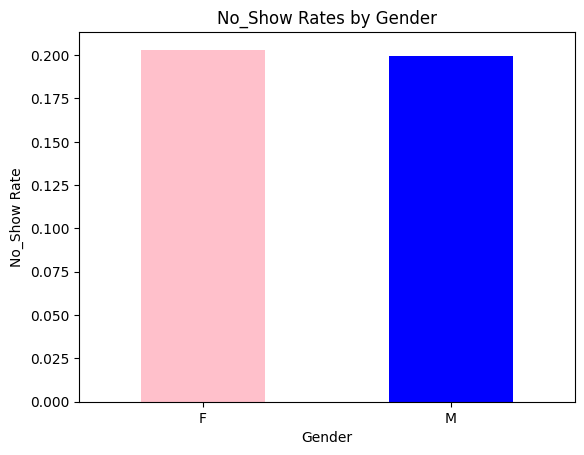

In [17]:
# Plot the no-show rate by gender
gender_no_show_rates.plot(kind = 'bar', color = ['pink', 'blue'])
plt.title('No_Show Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('No_Show Rate')
plt.xticks(rotation=0)
plt.show()

### Observation: 
The average number of no-show appointments by gender is fairly equal, with females having slightly more no-show appointments than males. Gender does not seem to be a factor in the frequency of no-show appointments.

## Questions 2.

### Does the day of the week of the appointment have any bearing on a patient's ability to show for their appointment?

In [18]:
# Create a new column to hold the extracted day of the week
df['Day_of_Week'] = df['Appointment_Day'].dt.day_name()

# Check the added column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Patient_ID       110527 non-null  int64              
 1   Appointment_ID   110527 non-null  int64              
 2   Gender           110527 non-null  object             
 3   Scheduled_Day    110527 non-null  datetime64[ns, UTC]
 4   Appointment_Day  110527 non-null  datetime64[ns, UTC]
 5   Age              110527 non-null  int64              
 6   Neighborhood     110527 non-null  object             
 7   Scholarship      110527 non-null  int64              
 8   Hypertension     110527 non-null  int64              
 9   Diabetes         110527 non-null  int64              
 10  Alcoholism       110527 non-null  int64              
 11  Handicap         110527 non-null  int64              
 12  SMS_received     110527 non-null  object             
 13 

In [19]:
# Calculate the no-show rate by day of the week, find the mean
no_show_rates = df.groupby('Day_of_Week')['No_Show'].apply(lambda x: (x == 'Yes').mean())

print(no_show_rates)

Day_of_Week
Friday       0.212261
Monday       0.206471
Saturday     0.230769
Thursday     0.193541
Tuesday      0.200936
Wednesday    0.196892
Name: No_Show, dtype: float64


In [20]:
# Define the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [21]:
# Reorder the no-show rate using defined order of days
no_show_rates = no_show_rates.reindex(days_order)

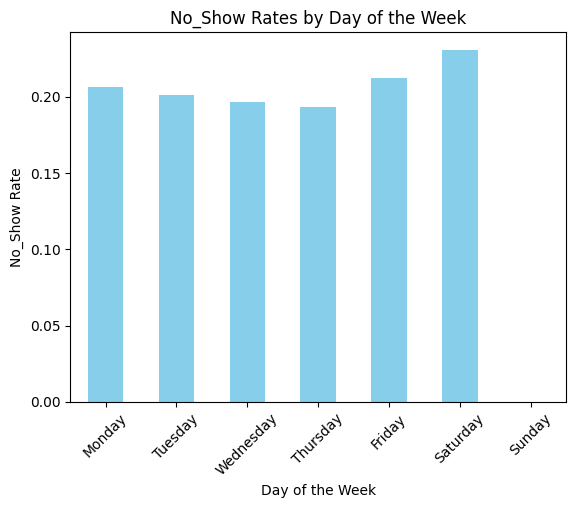

In [22]:
# Plot the no-show rate by day of the week
no_show_rates.plot(kind ='bar', color='skyblue')
plt.title('No_Show Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No_Show Rate')
plt.xticks(rotation=45)
plt.show()

### Observation:
The appointment no-show by day indicates that people are more likely to not show for their appointment if it is scheduled on  Friday or Saturday. There are no appointments scheduled on Sundays.

## Question 3.

### Are the number of days from 'Scheduled_Day' until 'Appoinment_Day' a factor in a patient's tendency to show up to their appointment? 

In [23]:
# Calculate the number of days from when the appointment was made until the appointment occured
df['Waiting_Days'] = (df['Appointment_Day'] - df['Scheduled_Day']).dt.days

In [24]:
# Group the number of days waited
bins = [0, 5, 10, 15, 20, 25, 30, max(df['Waiting_Days']) + 1]
labels = ['0-5 days', '6-10 days', '11-15 days', '16-20 days', '21-25 days', '26-30 days', 'Over 30 days']

In [25]:
# Create a new column with grouped waiting days
df['Waiting_Days_Category'] = pd.cut(df['Waiting_Days'], bins=bins, labels=labels, right=False)

# Check the first few entries to confirm categorization
print(df[['Waiting_Days', 'Waiting_Days_Category']].head())

   Waiting_Days Waiting_Days_Category
0             0              0-5 days
1             0              0-5 days
2             0              0-5 days
3             0              0-5 days
4             0              0-5 days


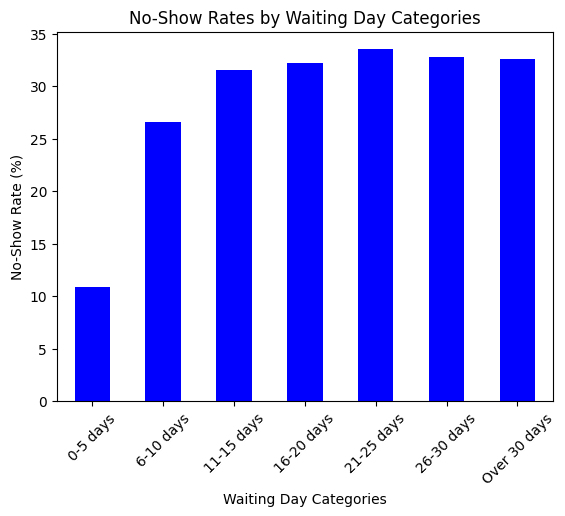

In [26]:
# Compare the grouped waiting days to no-shows, calculate the mean
category_no_show_rates = df.groupby('Waiting_Days_Category')['No_Show'].apply(lambda x: (x == 'Yes').mean() * 100)

# Plot the calcualated no-show rates
category_no_show_rates.plot(kind='bar', color='blue')
plt.title('No-Show Rates by Waiting Day Categories')
plt.xlabel('Waiting Day Categories')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Observation:
The data indicates that the longer the wait for the appointment, the more likely the patient will not show for their appointment.


## Question 4.

### Are certain age groups more likely to no-show for their appointment?

In [27]:
# Check the minimum and maximum age in the 'Age' column
min_age = df['Age'].min()
max_age = df['Age'].max()

# Print the age range
print(f"The age range in the dataset is from {min_age} to {max_age} years.")

The age range in the dataset is from -1 to 115 years.


In [28]:
# Define the bins for age groups
bins = [-1, 1, 5, 12, 18, 25, 35, 45, 55, 65, 75, 85, 100, 115]
labels = ['Under 1 year', '1-5 years', '6-12 years', '13-18 years', '19-25 years',
          '26-35 years', '36-45 years', '46-55 years', '56-65 years',
          '66-75 years', '76-85 years', '86-100 years', 'Over 100 years']

# Categorize the ages
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Check the first few entries to confirm categorization
print(df[['Age', 'Age_Group']].head())

   Age    Age_Group
0   62  56-65 years
1   56  56-65 years
2   62  56-65 years
3    8   6-12 years
4   56  56-65 years


In [29]:
# Calculate the no-show rate for each age group
no_show_rates_by_age = df.groupby('Age_Group')['No_Show'].apply(lambda x: (x == 'Yes').mean() * 100)

# Output the rates to check them
print(no_show_rates_by_age)

Age_Group
Under 1 year      18.134893
1-5 years         19.107957
6-12 years        22.804944
13-18 years       26.053640
19-25 years       25.387856
26-35 years       22.785337
36-45 years       21.135647
46-55 years       18.358489
56-65 years       15.750194
66-75 years       15.122013
76-85 years       15.949905
86-100 years      16.652212
Over 100 years    42.857143
Name: No_Show, dtype: float64


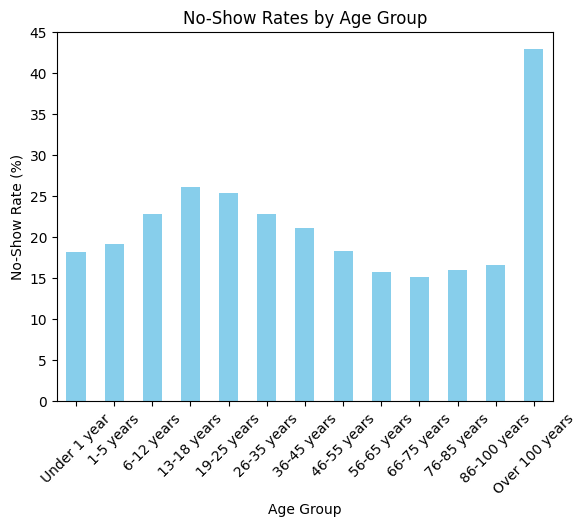

In [30]:
# Plotting the no-show rates for each age group
no_show_rates_by_age.plot(kind='bar', color='skyblue')
plt.title('No-Show Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Observation:
We can see from the graph that the age range for most missed appointments is ages 6-25. The highest rate of no-show is from the over 100 category, this could be an outlier as the probability of having many patients over 100 is low.

## Question 5.

### Does the SMS reminder encourage patients to show for their appointment?

In [31]:
# Calculate the show and no-show rates
sms_show_rates = df.groupby('SMS_received')['No_Show'].apply(lambda x: (x == 'No').mean())
sms_no_show_rates = df.groupby('SMS_received')['No_Show'].apply(lambda x: (x == 'Yes').mean())

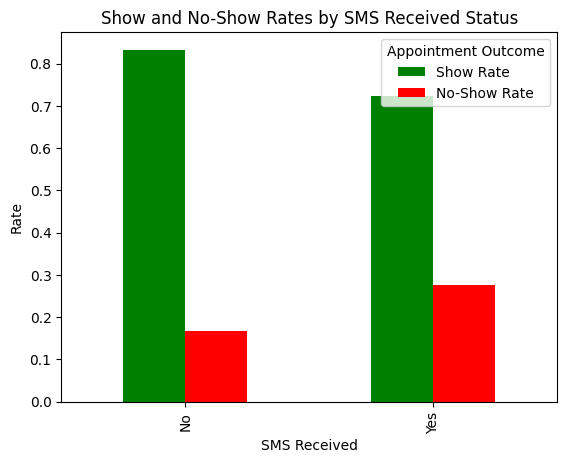

In [32]:
# Create a new DataFrame to store these rates for easier plotting
rates_df = pd.DataFrame({
    'Show Rate': sms_show_rates,
    'No-Show Rate': sms_no_show_rates})

# Plotting both show and no-show rates side by side
rates_df.plot(kind='bar', color=['green', 'red'])
plt.title('Show and No-Show Rates by SMS Received Status')
plt.xlabel('SMS Received')
plt.ylabel('Rate')
plt.legend(title='Appointment Outcome')
plt.show()

In [33]:
# Determine how many patients are over the age 100
patients_age = df[df['Age']>100]
# Count the number of patients over 100
patients_over_100 = patients_age.shape[0]

print('The number of patients over 100 is', patients_over_100)

The number of patients over 100 is 7


### Observation:
The no-show rate for patients who received the SMS reminder, is higher than if they did not receive and reminder.

<a id='conclusions'></a>
## Conclusions

> Male and Female patients no-show for their appointments at an almost equal rate.

> The day the appointment is scheduled on does slightly increase the probability of a no-show. The days with the highest no-show rate are Friday and Saturday, with a no-show rate of about 20%.

> The number of days a patient waits for an appointment, from the day it is scheduled until the day of the appointment, provides some pretty good insight. Only 10% of appointments are no-showed if they occur within 5 days of being scheduled. Analyzing the acuity of the patient's need for a sooner appointment, or the availability of appointments during that timeframe, might provide a greater understanding as to why this may be.

> According to the data, if the patient is between the ages of 6-35 years old, there is about a 25% chance that they will not show for their appointment. Patients between the age of 56-65 are the least likely to no-show for their appointment. I was very surprised to see that there are 7 patients over the age of 100 in the dataset. While this isn't a large number of people compared to the dataset, they do have the highest number of no-show appointments compared to all of the other age groups.

> The SMS appointment reminders does not increase the likelihood that the patient will show up to their appointment. 


> If we had more information about the type of appointment and the patient's need for the appointment e.g., acute illness, follow-up on existing condition, or annual physical, this could provide us with some additional insight.

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 553988 bytes to Investigate_a_Dataset.html
